# 911 Calls Project

We will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


#### Data and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [14]:
df.shape

(99492, 9)

In [8]:
# Top 5 zipcodes for 911 calls
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
# Top 5 townships (twp) for 911 calls
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [13]:
# No. of unique title codes
len(df['title'].unique())

110

#### Creating new features

We see that in the titles column; EMS, Fire, and Traffic are Reasons/Departments specified before the title code.
Create a new column called "Reason" that contains this string using .apply() with a custom lambda expression.

In [17]:
x = df['title'].iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [19]:
x.split(':')[0]

'EMS'

In [20]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [21]:
df['reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

** What is the  based off of this new column? **

In [23]:
# Most common Reason for a 911 call
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

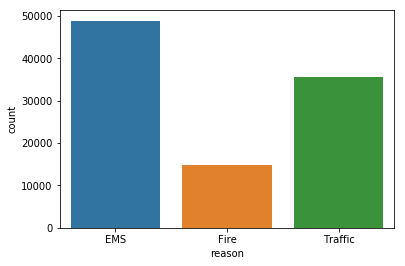

In [24]:
# Visualizing 911 calls by Reason
sns.countplot(x='reason', data=df)

In [25]:
# Convert 'timeStamp' column to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [28]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [33]:
time.hour

17

Extract hour, month & dayOfWeek columns

In [34]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [39]:
df['month'] = df['timeStamp'].apply(lambda time: time.month)

In [37]:
df['dayOfWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [40]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e reason  hour  month  dayOfWeek  
0      REINDEER CT & DEAD END  1    EMS    17     12          3  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12          3  
2                    HAWS AVE  1   Fire    17     12          3  
3          AIRY ST & SWEDE ST  1    EMS    17     12          3  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12          3

In [41]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [42]:
# map the dict of str names to the day of the week
df['dayOfWeek'] = df['dayOfWeek'].map(dmap)

In [43]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e reason  hour  month dayOfWeek  
0      REINDEER CT & DEAD END  1    EMS    17     12       Thu  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12       Thu  
2                    HAWS AVE  1   Fire    17     12       Thu  
3          AIRY ST & SWEDE ST  1    EMS    17     12       Thu  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12       Thu

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

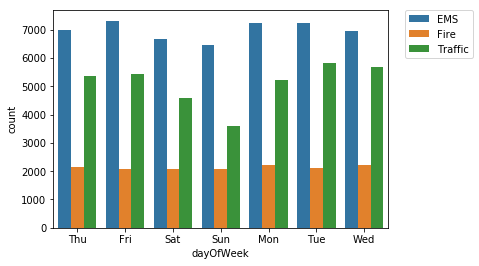

In [45]:
# Visualize 911 calls by dayOfWeek based off of the reason
sns.countplot(x='dayOfWeek', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

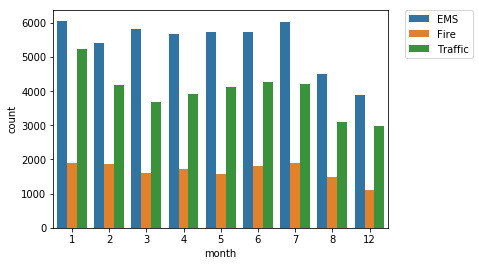

In [46]:
# Visualize 911 calls by month based off of the reason
sns.countplot(x='month', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

We see that there are some Months missing. We'll try to create some other visualization that tries to take the missing months into account or fill in those missing data points

In [48]:
# Droup the DataFrame by the month column and aggregate by month
byMonth = df.groupby('month').count()

In [50]:
byMonth

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   
6      11786  11786  11786  10212  11786      11786  11777  11732  11786   
7      12137  12137  12137  10633  12137      12137  12133  12088  12137   
8       9078   9078   9078   7832   9078       9078   9073   9025   9078   
12      7969   7969   7969   6907   7969       7969   7963   7916   7969   

       reason   hour  dayOfWeek  
month                            
1       13205  13205      13205  
2       11467  11467      11467  
3       11101  11101      11101  
4       11326  11326      11326  
5       11423  11423      11423  
6       11786  11786      11786  
7       12137  12137      12137  
8        9078   9078       9078  
12       7969   7969       7969

Some of the counts are different depending on the actual column value. This means some values are essentially missing

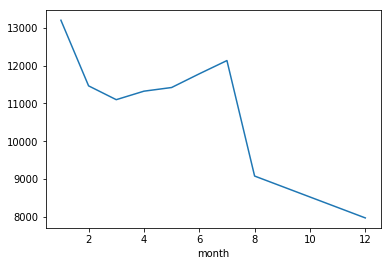

In [51]:
# Create a plot to indicate the count of calls per month
byMonth['lat'].plot()

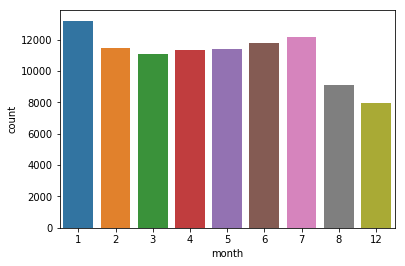

In [54]:
#We've been able to fill in some of that missing info thru a fit between pt@8 & pt@12. 
#we can see a down curve better than the below plot
sns.countplot(x='month', data=df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


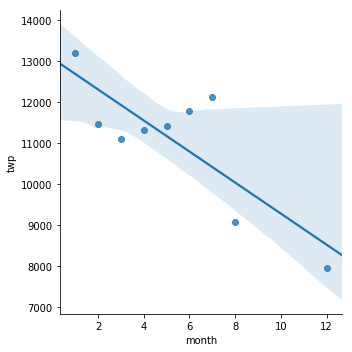

In [55]:
#Create a linear fit on the number of calls per month
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

We see that number of calls drop down by month.

In [57]:
time.date()

datetime.date(2015, 12, 10)

In [58]:
# Create a date column 
df['date'] = df['timeStamp'].apply(lambda time:time.date())
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e reason  hour  month dayOfWeek        date  
0      REINDEER CT & DEAD END  1    EMS    17     12       Thu  2015-12-10  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12       Thu  2015-12-10  
2                    HAWS AVE  1   Fire    17     12       Thu  2015-12-10  
3          AIRY ST & SWEDE ST  1    EMS    17     12       Thu  2015-12-10  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12       Thu  2015-12-10

In [60]:
# Instances per date for the actual day that the 911 call occurred
df.groupby('date').count().head()
# there's a difference of counts between different columns because of missing data values

lat  lng  desc  zip  title  timeStamp  twp  addr    e  reason  \
date                                                                        
2015-12-10  115  115   115  100    115        115  115   113  115     115   
2015-12-11  396  396   396  333    396        396  395   391  396     396   
2015-12-12  403  403   403  333    403        403  403   401  403     403   
2015-12-13  319  319   319  280    319        319  319   317  319     319   
2015-12-14  447  447   447  387    447        447  446   445  447     447   

            hour  month  dayOfWeek  
date                                
2015-12-10   115    115        115  
2015-12-11   396    396        396  
2015-12-12   403    403        403  
2015-12-13   319    319        319  
2015-12-14   447    447        447

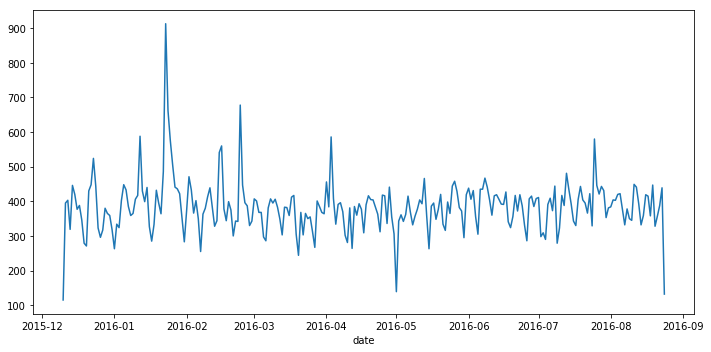

In [93]:
# Visualize the number of 911 calls by Date
df.groupby('date').count()['twp'].plot(figsize=(10,5))
plt.tight_layout()
# We see significant upward spikes before Feb and also before March, and some down spikes in May & August

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

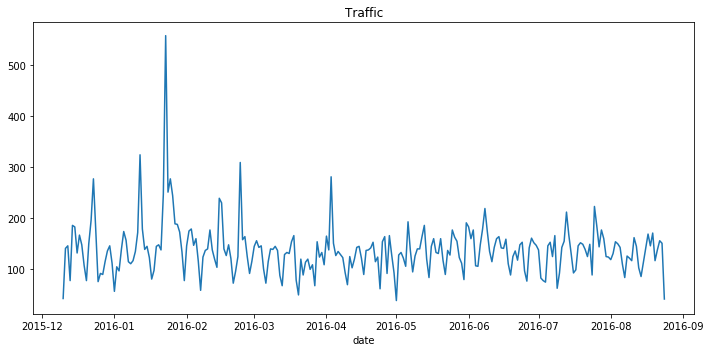

In [94]:
# Visualize the number of 911 calls categorized by Traffic based on Days
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot(figsize=(10,5))
plt.title('Traffic')
plt.tight_layout()

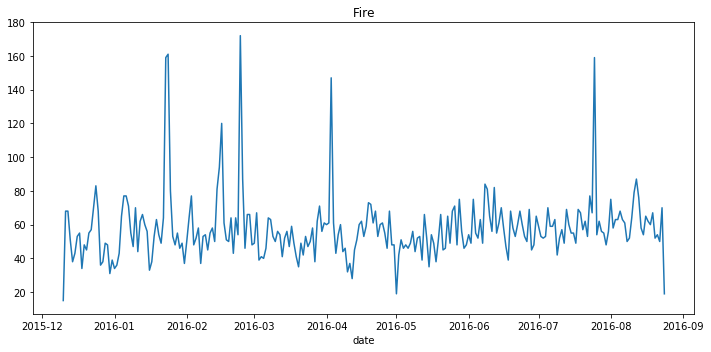

In [95]:
# Visualize the number of 911 calls categorized by Fire based on Days
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot(figsize=(10,5))
plt.title('Fire')
plt.tight_layout()

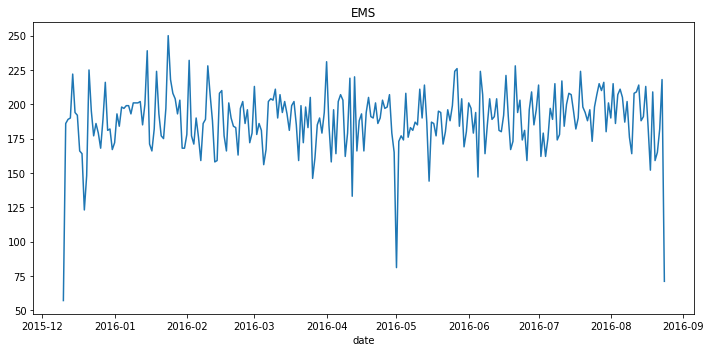

In [96]:
# Visualize the number of 911 calls categorized by EMS based on Days
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot(figsize=(10,5))
plt.title('EMS')
plt.tight_layout()

We'll restructure the dataframe so that the columns become the Hours and the Index becomes the DayofWeek to create a HeatMap

In [88]:
df.groupby(by=['dayOfWeek','hour']).count()

lat   lng  desc  zip  title  timeStamp   twp  addr     e  \
dayOfWeek hour                                                              
Fri       0      275   275   275  248    275        275   275   275   275   
          1      235   235   235  200    235        235   235   232   235   
          2      191   191   191  165    191        191   191   191   191   
          3      175   175   175  164    175        175   175   175   175   
          4      201   201   201  184    201        201   201   201   201   
          5      194   194   194  166    194        194   194   194   194   
          6      372   372   372  319    372        372   372   369   372   
          7      598   598   598  526    598        598   598   593   598   
          8      742   742   742  637    742        742   742   737   742   
          9      752   752   752  663    752        752   752   748   752   
          10     803   803   803  722    803        803   803   800   803   
          11     859   859   859  756    859        859   859   858   859   
          12     885   885   885  764    885        885   885   877   885   
          13     890   890   890  767    890        890   890   885   890   
          14     932   932   932  808    932        932   931   926   932   
          15     980   980   980  840    980        980   980   976   980   
          16    1039  1039  1039  897   1039       1039  1039  1038  1039   
          17     980   980   980  826    980        980   980   971   980   
          18     820   820   820  714    820        820   819   818   820   
          19     696   696   696  616    696        696   696   693   696   
          20     667   667   667  569    667        667   667   666   667   
          21     559   559   559  491    559        559   558   553   559   
          22     514   514   514  445    514        514   514   513   514   
          23     474   474   474  400    474        474   474   469   474   
Mon       0      282   282   282  243    282        282   282   282   282   
          1      221   221   221  198    221        221   220   221   221   
          2      201   201   201  183    201        201   201   201   201   
          3      194   194   194  173    194        194   194   194   194   
          4      204   204   204  185    204        204   204   203   204   
          5      267   267   267  222    267        267   267   267   267   
...              ...   ...   ...  ...    ...        ...   ...   ...   ...   
Tue       18     905   905   905  761    905        905   905   900   905   
          19     731   731   731  666    731        731   731   722   731   
          20     647   647   647  579    647        647   647   646   647   
          21     571   571   571  494    571        571   570   565   571   
          22     462   462   462  411    462        462   462   460   462   
          23     274   274   274  245    274        274   274   273   274   
Wed       0      250   250   250  226    250        250   249   249   250   
          1      216   216   216  193    216        216   216   216   216   
          2      189   189   189  169    189        189   189   188   189   
          3      209   209   209  195    209        209   207   209   209   
          4      156   156   156  138    156        156   156   155   156   
          5      255   255   255  224    255        255   254   254   255   
          6      410   410   410  334    410        410   409   409   410   
          7      701   701   701  591    701        701   701   692   701   
          8      875   875   875  770    875        875   875   872   875   
          9      808   808   808  714    808        808   808   805   808   
          10     800   800   800  713    800        800   800   799   800   
          11     789   789   789  698    789        789   789   784   789   
          12     903   903   903  812    903        903   902   901   903   
          13 

In [90]:
dayhour = df.groupby(by=['dayOfWeek','hour']).count()['reason'].unstack()

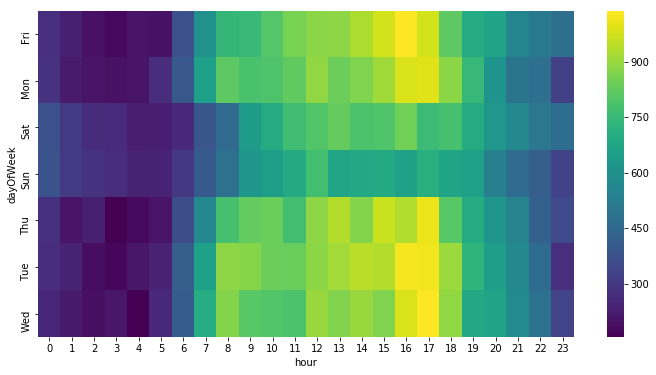

In [97]:
# Create a HeatMap
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')

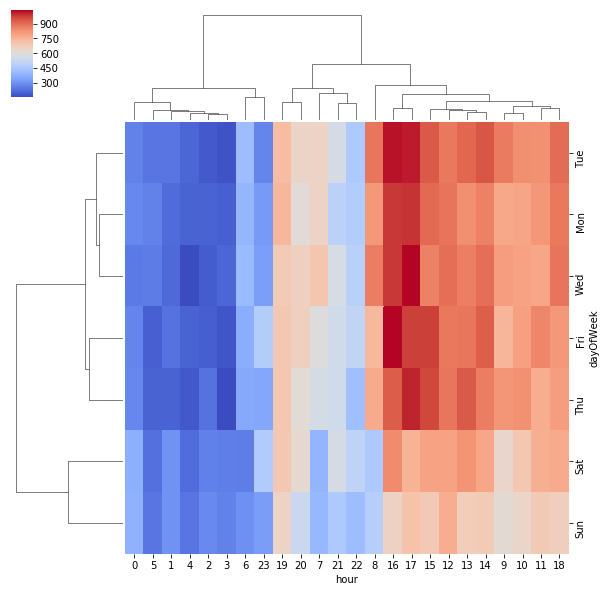

In [103]:
# Create a clustermap
sns.clustermap(dayhour,cmap='coolwarm')

In [100]:
#Repeating these same plots and operations, for a DataFrame that shows the Month as the column
daymonth = df.groupby(by=['dayOfWeek','month']).count()['reason'].unstack()
daymonth.head()

month        1     2     3     4     5     6     7     8     12
dayOfWeek                                                      
Fri        1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon        1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat        2291  1441  1266  1734  1444  1388  1695  1099   978
Sun        1960  1229  1102  1488  1424  1333  1672  1021   907
Thu        1584  1596  1900  1601  1590  2065  1646  1230  1266

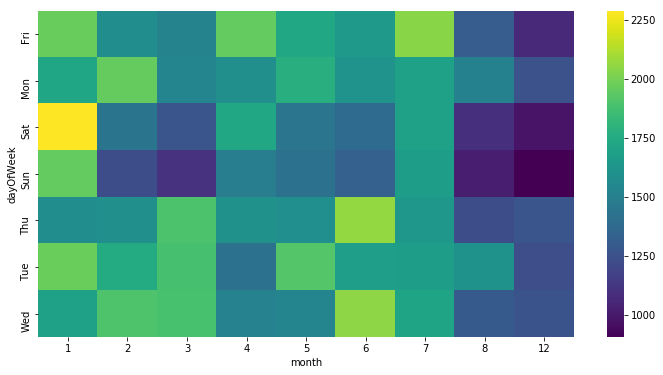

In [101]:
# Create a HeatMap
plt.figure(figsize=(12,6))
sns.heatmap(daymonth,cmap='viridis')

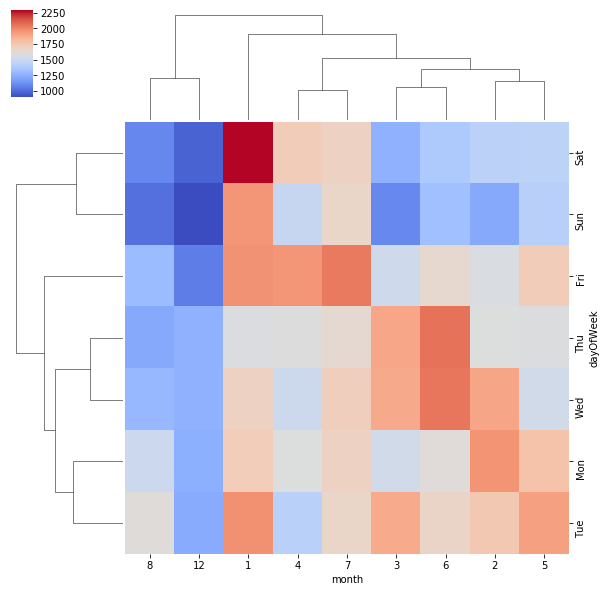

In [104]:
# Create a clustermap
sns.clustermap(daymonth,cmap='coolwarm')

We explored that not a lot of calls occur between 0-5 hrs. Most of the 911 calls occur during daytime and weekdays peaking between 15-18 hrs.